In [242]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

In [205]:
# kernel function
def kernel(x, xi, theta): 
    normv = np.linalg.norm(x-xi)
    
    return theta[0] * np.exp(-(theta[1]/2)*normv**2) + theta[2] + theta[3]*np.dot(x,xi)
    

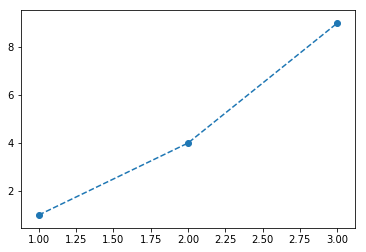

In [288]:
# let's imagine that point was at [1,2,3], with outputs [1, 4, 9]
xs = [1,2,3]
ys = [x**2 for x in xs]

plt.plot(xs,ys, '--')
plt.scatter(xs,ys)

plt.show()

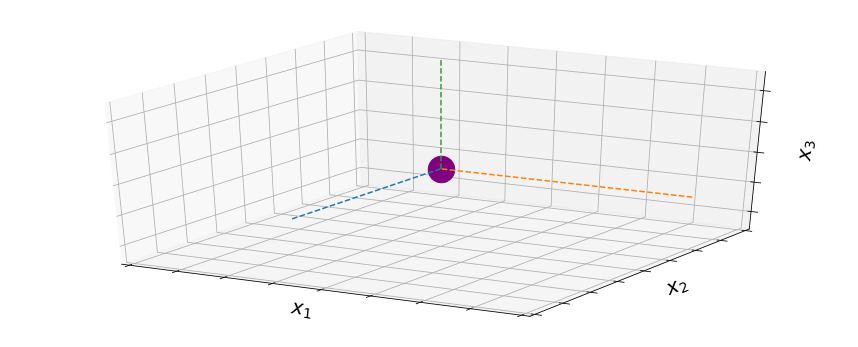

In [446]:
# point in 3D space
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

x = np.zeros(20)
y = np.linspace(-0.25,0,20)
z = np.ones(20)
zs = np.linspace(1, 1.7, 20)

ax.scatter(0,0,1,marker='o', color='purple',s=700)
plt.tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False, 
right=False,
left=False,# ticks along the top edge are off
labelbottom=False,
labeltop=False, 
labelleft=False, 
labelright=False)

ax.plot3D(x,y,z, '--')
ax.plot3D(-y,x,z, '--')
ax.plot3D(x,x,zs, '--')
ax.set_xlim3d(-0.2, 0.2) 
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylim3d(-0.2, 0.2) 
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlim3d(0.5, 1.5) 
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

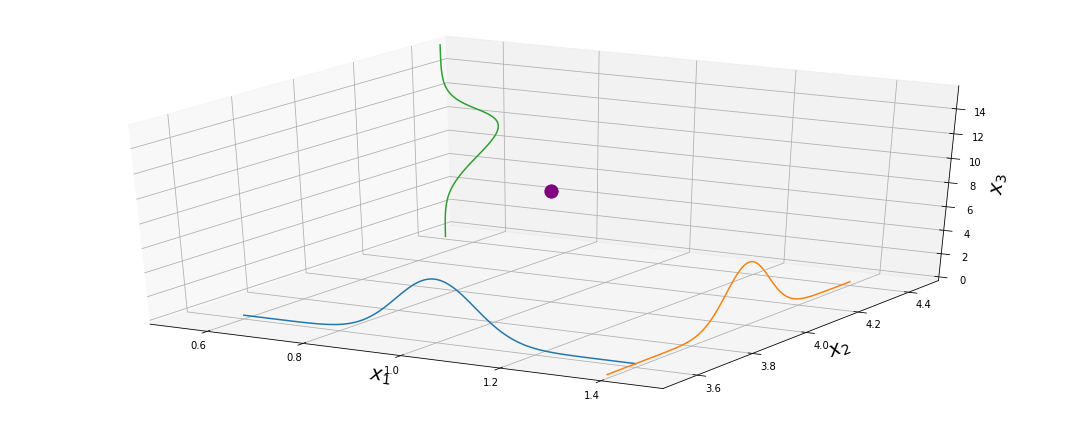

In [443]:
# sampling high dimensional point is like sampling for our outputs
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

# gaus. plot
xg = np.linspace(0.6,1.4,100)
yg = np.repeat(3.6,100)
zg = [norm.pdf(x, loc=1, scale=0.08) for x in xg]

x2g = np.repeat(1.4,100)
y2g = np.linspace(3.5,4.4, 100)
z2g = [norm.pdf(x, loc=4, scale=0.08) for x in y2g]

x3g = np.repeat(0.6, 100)
# y3g = 4.4 #np.repeat(4.4,100)
ls = np.linspace(1, 17,100)
z3g = [norm.pdf(x, loc=9, scale=2)+ 4.3 for x in ls]
5
ax.scatter(1,4,9,marker='.', color='purple',s=700)
# plt.tick_params(
# axis='both',          # changes apply to the x-axis
# which='both',      # both major and minor ticks are affected
# bottom=False,      # ticks along the bottom edge are off
# top=False, 
# right=False,
# left=False,# ticks along the top edge are off
# labelbottom=False,
# labeltop=False, 
# labelleft=False, 
# labelright=False)

ax.plot3D(xg,yg,zg)
ax.plot3D(x2g,y2g,z2g)
ax.plot3D(x3g, z3g, ls)
# print(z3g[1:10])
# for i in range(100):
#     ax.scatter(x3g,z3g[i],ls[i])

ax.set_xlim3d(0.5, 1.5) 
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylim3d(3.5, 4.5) 
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlim3d(0, 15.5) 
ax.set_zlabel('$x_3$', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# since covariance is based on input distance, the sample of next point/dimension depends on conditional gaussian


[6.90662423]


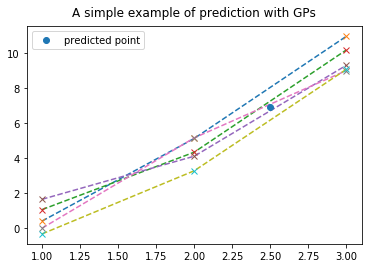

In [287]:
# how do we predict a point at 2.5? 
# A simple example
pts = [1,2,3]
targets= [x**2 for x in xs]
cov_matrix = np.zeros((3,3))
th = [1,4,0,0]

for i in range(3):
    for j in range(3):
        cov_matrix[i,j] = kernel(pts[i], pts[j], th)
     
    
# add some noise
# cov_matrix = cov_matrix + 10*np.eye(3)
ys = []

# sampled functions using square prior mean
for i in range(5):
    ys.append(np.random.multivariate_normal(targets, cov_matrix))
    plt.plot(pts, ys[i], '--')
    plt.plot(pts, ys[i], 'x')


# predict new point
new_pt = 2.5
new_cov = np.zeros((4,4))

# calculate for new point against every old pt
k = np.array([kernel(pts[i], new_pt, th) for i in range(3)]) 
# new pt against itself
s = kernel(new_pt, new_pt, th)

new_cov[0:3, 0:3] = cov_matrix
new_cov[3, 0:3] = k
new_cov[0:3, 3] = k
new_cov[3,3] = s


# we don't actually have to make the new covar matrix to get the prediction
k = k[np.newaxis, :]
new_mean = np.dot(np.matmul(k,np.linalg.inv(cov_matrix)), targets)
print(new_mean)
point = plt.plot(new_pt, new_mean, 'o', label='predicted point')
plt.title("A simple example of prediction with GPs", pad=10)
plt.legend()

## Sampling functions from Gaussian Process 1D



In [207]:
# equally spaced input X 
datapts = np.linspace(-3,3,100) 
num_pts = len(datapts)

# init. kernel covar. matrix
kernel_matrix = np.zeros((num_pts, num_pts))

# let's look at some diff parameters for kernel
theta = [np.array([1,4,0,0]), np.array([1,4,0,5]), np.array([1,64,0,0]), np.array([1,4, 10,0])]


In [209]:
kernel_matrices = []
# compute kernel matrices
for k in range(len(theta)):
    for i in range(num_pts):
        for j in range(num_pts):
            kernel_matrix[i,j] = kernel(datapts[i], datapts[j], theta[k]) 
    
    kernel_matrices.append(kernel_matrix)


# add noise if desired
# noise = 0.000
# gram_matrix = kernel_matrix + noise*np.eye(num_pts)

In [210]:
# sample outputs using kernel cov. matrix and zero mean 
means = np.zeros(num_pts)
alt_means = 100*norm.pdf(datapts, 0, 2) 
samples = []
thetasamples=[] # hold the samples for diff. thetas

for k in range(len(theta)):
    for i in range(5):
        samples.append(np.random.multivariate_normal(means, kernel_matrices[k]))

    thetasamples.append(samples)


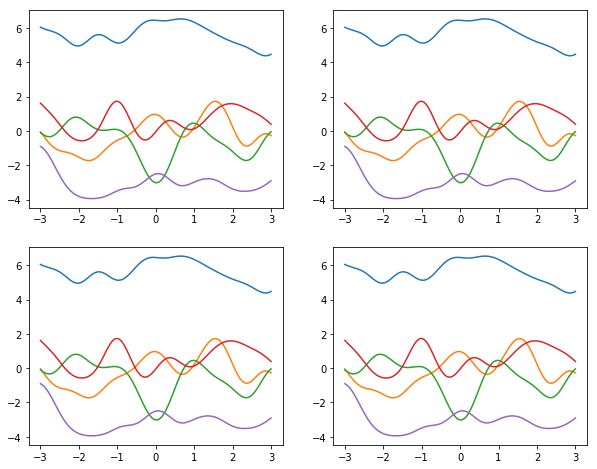

In [211]:
# plot sampled functions
fig = plt.figure(figsize=(10,8))

for i in range(4):
    ys = thetasamples[i]
    ax = fig.add_subplot(221 + i)
    ax.plot(datapts, ys[0], datapts, ys[1], datapts, ys[2], datapts, ys[3], datapts, ys[4])

# ys = samples
# plt.plot(datapts, ys[0], datapts, ys[1], datapts, ys[2], datapts, ys[3], datapts, ys[4])
plt.show()

## Sampling functions from Gaussian Process 2D



In [102]:
gridsize = 25
xs = np.linspace(-1,1,gridsize)
ys = np.linspace(-1,1,gridsize)
thetas = [[1,1,1,1],
          [1,10,1,1]
         ]

# now we have a grid of datapoints [x,y]
grid = np.array([(x,y) for x in xs for y in ys])

# 441 x 441
k_matrix = np.zeros((len(grid),len(grid)))

# feed through kernel function to make covariance matrix

for i in range(len(grid)):
    for j in range(len(grid)): 
        k_matrix[i,j] =  kernel(grid[i], grid[j], thetas[1])
        
        
# add noise if desired
noise = 0.00
k_matrix = k_matrix + noise*np.eye(len(grid))

In [138]:
# sampling from multivariate gaussian using zero mean
means = np.zeros(len(grid))

zs = []
for i in range(4): 
     zs.append(np.random.multivariate_normal(means, k_matrix).reshape((gridsize,gridsize)))


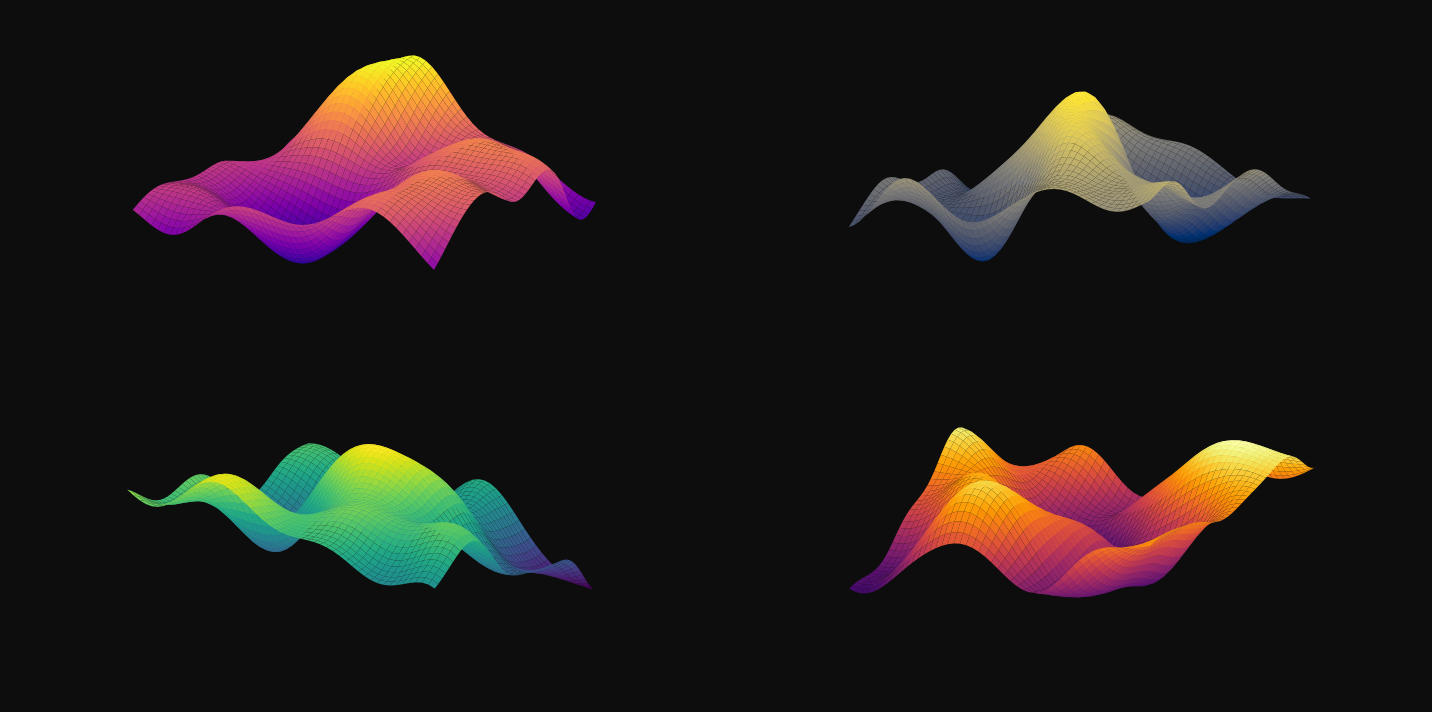

In [141]:
# make our pretty 3D plot

X, Y = np.meshgrid(xs, ys)

fig = plt.figure(figsize=(20,10))

colours = ['plasma','cividis',  'viridis','inferno']
bkgcolour = (0.05,0.05,0.05)

for i in range(4):
    ax = fig.add_subplot(221 + i, projection='3d')
    ax.plot_surface(X, Y, zs[i], cmap= colours[i])
    
    plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    right=False,
    left=False,# ticks along the top edge are off
    labelbottom=False,
    labeltop=False, 
    labelleft=False, 
    labelright=False)
    
    ax.patch.set_facecolor(bkgcolour)
    plt.axis("off")
    
# ax = fig.add_subplot(221, projection='3d')
# ax2 = fig.add_subplot(222, projection='3d')

# ax.plot_surface(X, Y, zs[0], cmap='summer')
# ax2.plot_surface(X, Y, zs[1], cmap='spring')

fig.tight_layout() 
fig.patch.set_facecolor(bkgcolour)

plt.savefig("2dgps.png", facecolor=bkgcolour)

plt.show()


In [221]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, zs[3], cmap= colours[1])
ax.patch.set_facecolor(bkgcolour)
plt.axis("off")


# plt.savefig("lonegp.png", facecolor=bkgcolour)

plt.show()